# Handling data with pandas


## Motivation

So far, we have encountered NumPy arrays as the only way to store numerical
data (we mostly ignored the built-in containers provided directly in Python).
However, while NumPy arrays are great for storing homogenous data
without any particular structure, they are somewhat limited when
we want to use them for high-level data analysis.

For example, we usually want to process data sets with

1.  several variables;
2.  multiple observations, which need not be identical across
    variables (some values may be missing);
3.  non-homogenous data types: for examples,
    names need to be stored as strings, birthdays as dates and income as
    a floating-point number.

While NumPy can in principle handle such situations, it puts all the
burden on the user. Most users would prefer to not have to deal
with such low-level details.

Imagine we want to store names, birth dates and
annual income for two people:

| Name | Date of birth | Income |
| ---- | ------------- | ------ |
| Alice | 1985-01-01   | 30,000 |
| Bob  | 1997-05-12    | -      |

No income was reported for Bob, so it's missing.
With NumPy, we could do this as follows:

In [1]:
import numpy as np
from datetime import date

date1 = date(1985, 1, 1)            # birth date for Alice
date2 = date(1997, 5, 12)           # birth date for Bob

data = np.array([['Alice', date1, 30000.0],
                 ['Bob', date2, None]])

data

array([['Alice', datetime.date(1985, 1, 1), 30000.0],
       ['Bob', datetime.date(1997, 5, 12), None]], dtype=object)

In [2]:
data.dtype          # print array data type

dtype('O')

While we can create such arrays, they are almost useless for data analysis,
in particular since everything is stored as a generic `object`.

-   To be fair, NumPy offers an alternative array type called
    ["record" or "structured" array](https://numpy.org/doc/stable/user/basics.rec.html)
    which can handle fields of different data types.

    However, the pandas library offers much more beyond that,
    so there is little reason to use structured arrays.

Pandas was created to offer more versatile data structures that are
straightforward to use for storing, manipulating and analysing
heterogeneous data:

1.  Data is clearly organised in *variables* and *observations*, similar
    to econometrics programs such as Stata.
2.  Each variable is permitted to have a different data type.
3.  We can use *labels* to select observations, instead of having to use
    a linear numerical index as with NumPy.

    We could, for example, index a data set using National Insurance Numbers.
4.  Pandas offers many convenient data aggregation and reduction
    routines that can be applied to subsets of data.

    For example, we can easily group observations by city and compute average
    incomes.
5.  Pandas also offers many convenient data import / export functions that
    go beyond what's in NumPy.

Should we be using pandas at all times, then? No!

-   For low-level tasks where performance is essential, use NumPy.
-   For homogenous data without any particular data structure, use NumPy.
-   On the other hand, if data is heterogeneous, needs to be imported from
    an external data source and cleaned or transformed before
    performing computations, use pandas.

There are numerous tutorials on pandas on the internet, so we will
keep this unit short and illustrate only the main concepts.
Useful references to additional material include:

-   The official [user guide](https://pandas.pydata.org/docs/user_guide/index.html).
-   The official [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    which nicely illustrates the most frequently used
    operations.
-   The official [API reference](https://pandas.pydata.org/docs/reference/index.html) with details on
    every pandas object and function.
-   There are numerous tutorials (including videos) available
    on the internet. See [here](https://pandas.pydata.org/docs/getting_started/tutorials.html)
    for a list.

***
## Creating pandas data structures

Pandas has two main data structures:

1.  `Series` represents observations of a single variable.
2.  `DataFrame` is a container for several variables. You can think
    of each individual column of a `DataFrame` as a `Series`,
    and each row represents one observation.

The easiest way to create a `Series` or `DataFrame` is to create
them from pre-existing data.

To access pandas data structures and routines, we need to import them first.
The near-universal convention is to make pandas available using the name `pd`:

In [3]:
import pandas as pd

*Examples:*

We can create a `DataFrame` from a NumPy array:

In [4]:
import numpy as np
import pandas as pd             # universal convention: import using pd
from numpy.random import default_rng

# Draw normally distributed data
rng = default_rng(123)
data = rng.normal(size=(10,3))

# Define variable (or column) names
varnames = ['A', 'B', 'C']

# Create pandas DataFrame
pd.DataFrame(data, columns=varnames)

,A,B,C
0,-0.989121,-0.367787,1.287925
1,0.193974,0.920231,0.577104
2,-0.636464,0.541952,-0.316595
3,-0.322389,0.097167,-1.525930
4,1.192166,-0.671090,1.000269
5,0.136321,1.532033,-0.659969
6,-0.311795,0.337769,-2.207471
7,0.827921,1.541630,1.126807
8,0.754770,-0.145978,1.281902
9,1.074031,0.392621,0.005114


This code creates a `DataFrame` of three variables called `A`, `B` and `C`
with 10 observations each.

Alternatively, we can create a `DataFrame` from non-homogenous data as follows:

In [5]:
# Names (strings)
names = ['Alice', 'Bob']

# Birth dates (datetime objects)
bdates = pd.to_datetime(['1985-01-01', '1997-05-12'])

# Incomes (floats)
incomes = np.array([35000, np.nan])         # code missing income as NaN

# create DataFrame from dictionary
pd.DataFrame({'Name': names, 'Birthdate': bdates, 'Income': incomes})

,Name,Birthdate,Income
0,Alice,1985-01-01,35000.0
1,Bob,1997-05-12,NaN


If data types differ across columns, as in the above example,
it is often convenient to create the `DataFrame` by passing
a dictionary as an argument. Each key represents a column name
and each corresponding value contains the data for that variable.

***
## Viewing data

With large data sets, you hardly ever want to print the entire `DataFrame`.
Pandas by default limits the amount of data shown. You can
use the `head()` and `tail()` methods to explicitly display a specific
number of rows from the top or the end of a `DataFrame`.

To illustrate, we use a data set of 23 UK universities that contains
the following variables:

-   `Instititution`: Name of the institution
-   `Country`: Country/nation within the UK (England, Scotland, ...)
-   `Founded`: Year in which university (or a predecessor institution)
    was founded
-   `Students`: Total number of students
-   `Staff`: Number of academic staff
-   `Admin`: Number of administrative staff
-   `Budget`: Budget in million pounds
-   `Russell`: Binary indicator whether university is a member of the
    [Russell Group](https://en.wikipedia.org/wiki/Russell_Group),
    an association of the UK's top research universities.

The data was compiled based on information from Wikipedia.

We read in the data stored in the file `universities.csv`
(from the `data/` folder) like this:

In [6]:
import pandas as pd

# relative path to CSV file
file = '../data/universities.csv'

# Load sample data set of UK universities. Individual fields are separated
# using ; so we need to pass sep=';' as an argument.
df = pd.read_csv(file, sep=';')

We can now display the first and last three rows:

In [7]:
df.head(3)      # show first three rows

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


In [8]:
df.tail(3)      # show last three rows

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0
21,Queen’s University Belfast,Northern Ireland,1810,18438,2414.0,1489.0,369.2,1
22,Swansea University,Wales,1920,20620,NaN,3290.0,NaN,0


To quickly compute some descriptive statistics for the
*numerical* variables in the `DataFrame`, we use `describe()`:

In [9]:
df.describe()

,Founded,Students,Staff,Admin,Budget,Russell
count,23.000000,23.000000,20.000000,19.000000,22.000000,23.000000
mean,1745.652174,24106.782609,3664.250000,3556.736842,768.609091,0.739130
std,256.992149,9093.000735,2025.638038,1550.434342,608.234948,0.448978
min,1096.000000,8984.000000,1086.000000,1489.000000,113.300000,0.000000
25%,1589.000000,18776.500000,2294.250000,2193.500000,340.850000,0.500000
50%,1826.000000,23247.000000,3307.500000,3485.000000,643.750000,1.000000
75%,1941.500000,30801.500000,4439.750000,4347.500000,1023.500000,1.000000
max,2004.000000,41180.000000,7913.000000,6199.000000,2450.000000,1.000000


Note that this automatically ignores the columns `Institution`
and `Country` as they contain strings, and computing the mean, etc.
of a string variable does not make sense.

To see low-level information about the data type
used in each column, we call `info()`:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Institution  23 non-null     object 
 1   Country      23 non-null     object 
 2   Founded      23 non-null     int64  
 3   Students     23 non-null     int64  
 4   Staff        20 non-null     float64
 5   Admin        19 non-null     float64
 6   Budget       22 non-null     float64
 7   Russell      23 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.6+ KB


Pandas automatically discards missing information
in computations. For example, the number of academic staff
is missing for several universities, so the number of
*non-null* entries reported in the table above is less than 23,
the overall sample size.

***
## Indexing

Pandas supports two types of indexing:

1.  Indexing by position. This is basically identical to the
    indexing of other Python and NumPy containers.
2.  Indexing by label, i.e., by the values assigned to the row or column index.
    These labels need not be integers in increasing order, as is the case
    for NumPy.

    We will see how to assign labels below.

Pandas indexing is performed either by using brackets `[]`, or by using
`.loc[]` for label indexing, or `.iloc[]` for positional indexing.

Indexing via `[]` can be somewhat confusing:

-   specifying `df['name']` returns the column `name` as a `Series` object.
-   On the other hand, specifying a range such as `df[5:10]` returns the *rows*
    associated with the *positions* 5,...,9.

*Examples:*

In [11]:
import pandas as pd

# Load sample data set of UK universities
df = pd.read_csv('../data/universities.csv', sep=';')
df['Institution']               # select a single column

0               University of Glasgow
1             University of Edinburgh
2            University of St Andrews
3              University of Aberdeen
4           University of Strathclyde
5                                 LSE
6                                 UCL
7             University of Cambridge
8                University of Oxford
9               University of Warwick
10            Imperial College London
11              King’s College London
12           University of Manchester
13              University of Bristol
14           University of Birmingham
15    Queen Mary University of London
16                 University of York
17           University of Nottingham
18               University of Dundee
19                 Cardiff University
20             University of Stirling
21         Queen’s University Belfast
22                 Swansea University
Name: Institution, dtype: object

In [12]:
df[['Institution', 'Students']]     # select multiple columns using a list

,Institution,Students
0,University of Glasgow,30805
1,University of Edinburgh,34275
2,University of St Andrews,8984
3,University of Aberdeen,14775
4,University of Strathclyde,22640
5,LSE,11850
6,UCL,41180
7,University of Cambridge,23247
8,University of Oxford,24515
9,University of Warwick,27278


To return the rows at positions 1, 2 and 3 we use

In [13]:
df[1:4]

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0


Pandas follows the Python convention that indices are 0-based, and the
endpoint of a slice is not included.

### Manipulating indices

Pandas uses *labels* to index and align
data. These can be integer values starting at 0 with increments of 1
for each additional element, which is the default, but they need not be.
The two main methods to manipulate indices are:

-   `set_index(keys=['column1', ...])`: uses the values of `column1`
    and optionally additional columns as indices, discarding the current index.
-   `reset_index()`: resets the index to its default value, a sequence
    of increasing integers starting at 0.

Both methods return a new `DataFrame` and leave the original `DataFrame`
unchanged. If we want to change the existing `DataFrame`, we need
to pass the argument `inplace=True`.

For example, we can replace the row index and use the Roman lower-case
 characters `a`, `b`, `c`, ... as labels
instead of integers:

In [14]:
import pandas as pd
df = pd.read_csv('../data/universities.csv', sep=';')

# Create list of lower-case letters which has same
# length as the number of observations.
index = [chr(97+i) for i in range(len(df))]     # len(df) returns number of obs.
index

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w']

In [15]:
df['index'] = index                             # create new column 'index'
df.set_index(keys=['index'], inplace=True)      # set letters as index!

# print first 3 rows using labels
df['a':'c']             # This is the same as df[:3]

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
index,,,,,,,,
a,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
b,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
c,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


To add to the confusion, note that when specifying a range in terms of
labels, the last element *is* included! Hence the row with index `c`
in the above example is shown.

We can reset the index to its default integer values using
the `reset_index()` method:

In [16]:
# Reset index labels to default value (integers 0, 1, 2, ...)
df_new = df.reset_index(drop=True)
df_new.head(3)          # print first 3 rows of new DataFrame

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


The `drop=True` argument tells pandas to throw away the old index
values instead of storing them as a column of the resulting `DataFrame`.

### Selecting elements

To more clearly distinguish between selection by label and by position,
pandas provides the `.loc[]` and `.iloc[]` methods of indexing.
To make your intention obvious, you should therefore adhere to the following
rules:

1.  Use `df['name']` only to select *columns* and nothing else.
2.  Use `.loc[]` to select by label.
3.  Use `.iloc[]` to select by position.

**Selection by label**

To illustrate, using `.loc[]` unambiguously indexes by label:

In [17]:
df.loc['d':'f', ['Institution', 'Students']]

,Institution,Students
index,,
d,University of Aberdeen,14775
e,University of Strathclyde,22640
f,LSE,11850


With `.loc[]` we can even perform slicing on column names, which
is not possible with the simpler `df[]` syntax:

In [18]:
df.loc['d':'f', 'Institution':'Founded']

,Institution,Country,Founded
index,,,
d,University of Aberdeen,Scotland,1495
e,University of Strathclyde,Scotland,1964
f,LSE,England,1895


This includes all the columns between `Institution` and `Founded`,
where the latter is included since we are slicing by label.

Trying to pass in positional arguments will return an error for
the given `DataFrame` since the index labels are `a`, `b`, `c`,...
and not 0, 1, 2...

In [19]:
df.loc[0:4]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

However, we can reset the index to its default value. Then
the index labels are integers and coincide with their position,
so that `.loc[]` works:

In [20]:
df.reset_index(inplace=True, drop=True)     # reset index labels to integers,
                                            # drop original index
df.loc[0:4]

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0


Again, the end point with label `4` is included because we
are selecting by label.

Somewhat surprisingly, we can also pass boolean arrays to `.loc[]`
even though these are clearly not labels:

In [21]:
df.loc[df['Country'] == 'Scotland']

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0
18,University of Dundee,Scotland,1967,15915,1410.0,1805.0,256.4,0
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0


Indexing via `.loc[]` supports a few more types of arguments,
see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label)
for details.

**Selection by position**

Conversely, if we want to select items exclusively by their position
and ignore their labels, we use `.iloc[]`:

In [22]:
df.iloc[0:4, 0:2]           # select first 4 rows, first 2 columns

,Institution,Country
0,University of Glasgow,Scotland
1,University of Edinburgh,Scotland
2,University of St Andrews,Scotland
3,University of Aberdeen,Scotland


Again, `.iloc[]` supports a multitude of other arguments,
including boolean arrays. See the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-position)
for details.


***
## Aggregation and reduction

### Working with entire DataFrames

The simplest way to perform data reduction is to invoke the desired
routine on the entire `DataFrame`:

In [23]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')
df.mean(numeric_only=True)

Founded      1745.652174
Students    24106.782609
Staff        3664.250000
Admin        3556.736842
Budget        768.609091
Russell         0.739130
dtype: float64

Methods such as `mean()` are by default applied column-wise to each
column. The `numeric_only=True` argument is used to discard
all non-numeric columns (depending on the version of pandas, `mean()` will
issue a warning otherwise).

One big advantage over NumPy is that missing values (represented
by `np.nan`) are automatically ignored:

In [24]:
# mean() automatically drops 3 missing observations
df['Staff'].mean()

3664.25

### Splitting and grouping

Applying aggregation functions to the entire `DataFrame` is similar
to what we can do with NumPy. The added flexibility of pandas
becomes obvious once we want to apply these functions to subsets of
data, i.e., groups, which we can define based on values or index labels.

For example, we can easily group our universities by country:

In [25]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')

groups = df.groupby(['Country'])

Here `groups` is a special pandas objects which can subsequently be
used to process group-specific data. To compute the group-wise
averages, we can simply run

In [26]:
groups.mean()

,Founded,Students,Staff,Admin,Budget,Russell
Country,,,,,,
England,1745.923077,27119.846154,4336.692308,4112.000000,1001.700000,1.000000
Northern Ireland,1810.000000,18438.000000,2414.000000,1489.000000,369.200000,1.000000
Scotland,1691.428571,19563.142857,2232.800000,2864.571429,410.471429,0.285714
Wales,1901.500000,23259.000000,3330.000000,4514.500000,644.800000,0.500000


Groups support column indexing: if we want to only compute the
total number of students for each country
in our sample, we can do this as follows:

In [27]:
groups['Students'].sum()

Country
England             352558
Northern Ireland     18438
Scotland            136942
Wales                46518
Name: Students, dtype: int64

There are numerous routines to aggregate grouped data, for example:

-   `mean()`, `sum()`: averages and sums over numerical items within groups.
-   `std()`, `var()`: within-group std. dev. and variances
-   `size()`: group sizes
-   `first()`, `last()`: first and last elements in each group
-   `min()`, `max()`: minimum and maximum elements within a group

*Examples:*

In [28]:
groups.size()       # return number of elements in each group

Country
England             13
Northern Ireland     1
Scotland             7
Wales                2
dtype: int64

In [29]:
groups.first()      # return first element in each group

,Institution,Founded,Students,Staff,Admin,Budget,Russell
Country,,,,,,,
England,LSE,1895,11850,1725.0,2515.0,415.1,1
Northern Ireland,Queen’s University Belfast,1810,18438,2414.0,1489.0,369.2,1
Scotland,University of Glasgow,1451,30805,2942.0,4003.0,626.5,1
Wales,Cardiff University,1883,25898,3330.0,5739.0,644.8,1


We can create custom aggregation routines by calling `agg()`
or `aggregate()` on the grouped object. To illustrate, we
count the number of universities in each country that have more
than 20,000 students:

In [30]:
groups['Students'].agg(lambda x: np.sum(x >= 20000))

Country
England             10
Northern Ireland     0
Scotland             3
Wales                2
Name: Students, dtype: int64

Note that we called `agg()` only on the column `Students`, otherwise
the function would be applied to every column separately, which is not
what we want.

The most flexible aggregation method is `apply()` which calls a
given function, passing the entire group-specific subset of data (including
all columns) as an argument, and glues together the results.

For example, if we want to compute the average budget per student
(in pounds), we can do this as follows:

In [31]:
# Budget is in millions of pounds, rescale by 1.0e6
groups.apply(lambda x: x['Budget'].sum() / x['Students'].sum() * 1.0e6)

Country
England             36936.050239
Northern Ireland    20023.863760
Scotland            20981.875539
Wales               13861.301002
dtype: float64

We couldn't have done this with `agg()`, since `agg()` never gets to see
the entire chunk of data but only one column at a time.

This section provided only a first look at pandas's "split-apply-combine"
functionality implemented via `groupby`. See the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
for more details.

***
## Visualisation

We covered plotting with Matplotlib in earlier units. Pandas itself
implements some convenience wrappers around Matplotlib plotting routines
which allow us to quickly inspect data stored in `DataFrames`.
Alternatively, we can extract the numerical data and pass it
to Matplotlib's routines manually.

For example, to plot student numbers as a bar chart, we can directly
use pandas:

<AxesSubplot:xlabel='Institution'>

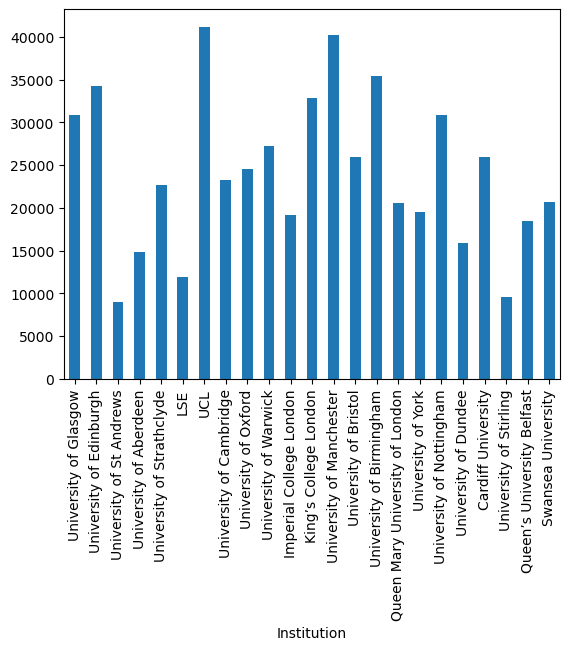

In [32]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')

# set institution as label so they automatically show up in plot
df2 = df.set_index(keys=['Institution'])
df2['Students'].plot(kind='bar')        # same as df2['Students'].plot.bar()

Alternatively, we can construct the graph using Matplotlib ourselves:

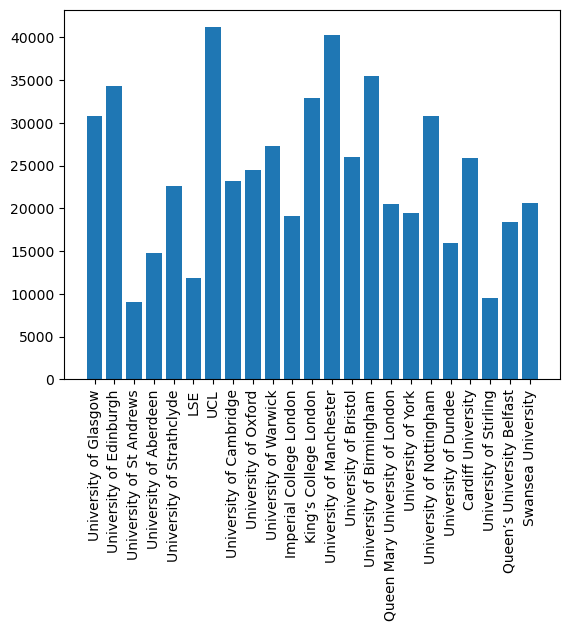

In [33]:
import matplotlib.pyplot as plt

labels = df['Institution'].to_list()        # labels as list
values = df['Students'].to_numpy()          # data as NumPy array
plt.bar(labels, values)
plt.tick_params(axis='x', labelrotation=90)

Sometimes Matplotlib's routines directly work with pandas's data structures,
sometimes they don't. In cases where they don't, we can convert a `DataFrame` or `Series` object
to a NumPy array using the `to_numpy()` method, and convert a `Series`
to a Python list using `to_list()`, as illustrated in the example above.


To plot timeseries-like data, we can use the `plot()` method,
which optionally accepts arguments to specify which columns
should be used for the $x$-axis and which for the $y$-axis:

<AxesSubplot:xlabel='A'>

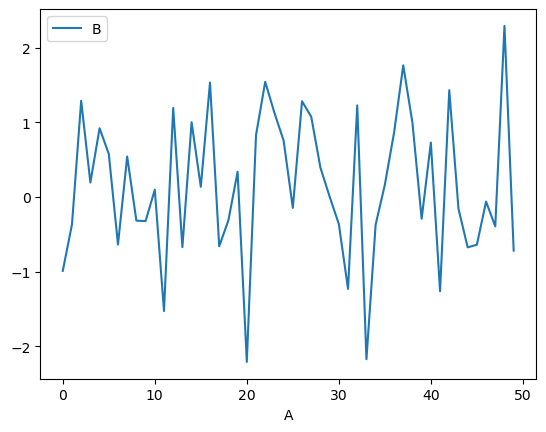

In [34]:
import numpy as np
import pandas as pd

# Instantiate RNG
rng = np.random.default_rng(123)

# Create pandas DataFrame
nobs = 50
df = pd.DataFrame({'A': np.arange(nobs), 'B': rng.normal(size=nobs)})

df.plot(x='A', y='B')       # plot A on x-axis, B on y-axis

To quickly generate some descriptive statistics, we can use
the built-in box plot:

<AxesSubplot:>

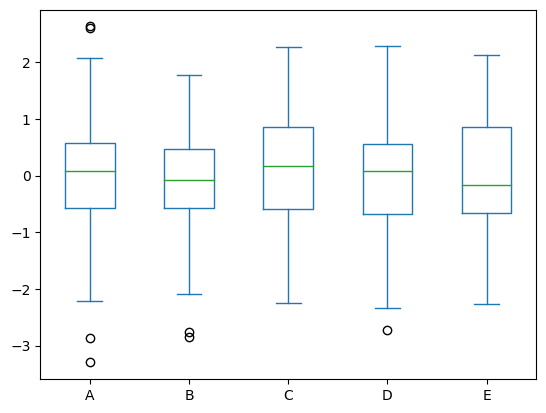

In [35]:
import numpy as np
import pandas as pd

# Instantiate RNG
rng = np.random.default_rng(123)

# Create pandas DataFrame
df = pd.DataFrame(rng.normal(size=(100, 5)),
                  columns=['A', 'B', 'C', 'D', 'E'])

df.plot.box()           # same as df.plot(kind='box')

Similarly, we can generate scatter plots, plotting one column
against another:

<AxesSubplot:xlabel='A', ylabel='E'>

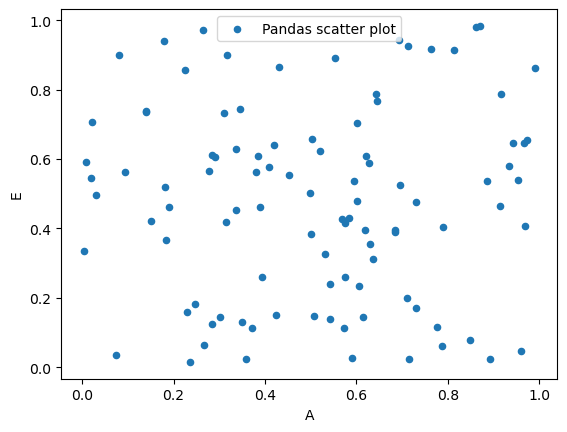

In [36]:
# Create pandas DataFrame
df = pd.DataFrame(rng.uniform(size=(100, 5)),
                  columns=['A', 'B', 'C', 'D', 'E'])

df.plot.scatter(x='A', y='E', label='Pandas scatter plot')

<AxesSubplot:xlabel='A', ylabel='E'>

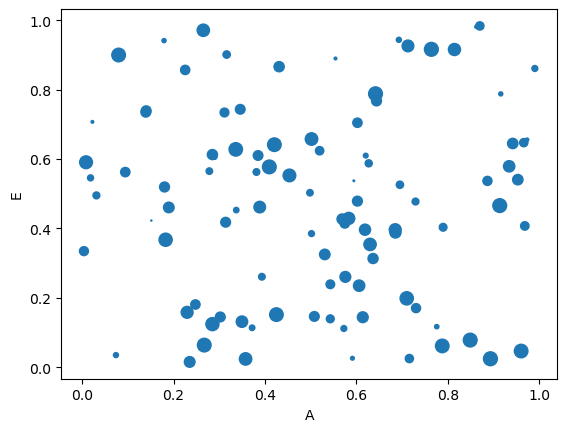

In [37]:
# We can even use a column to specify the dot size!
df.plot.scatter(x='A', y='E', s=df['B']*100.0)

In general, the wrappers implemented in pandas are useful to
get an idea how the data looks like. For reusable code or more
complex graphs, we'll usually want to directly use Matplotlib
and pass the data converted to NumPy arrays.

***
## Exercises

The following exercises use data files from the `data/` folder.

### Exercise 1: Basic data manipulations

In this exercise, we will perform some basic data manipulation and plot the results.

1.  Load the CSV file `FRED_QTR.csv` (using `sep=','`). 
    Set the columns `Year` and `Quarter` as (joint) indices.

    *Hint:* You can do this by specifying these column names in the `index_col` 
    argument of [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Alternatively, you can cell [`set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)
    once you have loaded the data.
2.  This data comes at a quarterly frequency. Convert it to annual values by computing
    the average values for each year.

    *Hint:* Group the data by `Year` using the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function and compute 
    the mean on the grouped data.
3.  Compute two new variables from the annualised data and add them to the `DataFrame`:
    -   `Inflation`, defined as the growth rate of `CPI` (consumer price index)
    -   `GDP_growth`, defined as the growth rate of `GDP`
4.  Drop all rows with missing values (these show up as `NaN`).

    *Hint:* There is no need to manually filter out `NaN` values, you can 
    use the [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method instead.
5.  Plot the columns `GDP_growth`, `Inflation`, `UNRATE` (unemployment rate)
    and `LFPART` (labour force participation) using the pandas plotting routines.
    Use the option `subplots=True` and `layout=(2,2)` to create a $2\times2$ grid.
    See the documentation for [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) for details.

### Exercise 2: Decade averages

Load the FRED data from the CSV file `FRED_QTR.csv` (using `sep=','`) and 
perform the following tasks:

1.  Compute the quarterly GDP growth rate and inflation, similar to what you 
    did in the previous exercise.
2.  Add the column `Decade` which contains the decade for every observation.
    Use 1940 to code the 40s, 1950 for the 50s, etc.
3.  We want to retain only observations for decades for which all 40 quarters
    are present:
    1.  Group the data by `Decade` and count the number of observations using 
        [`count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html).
    2.  A decade should be kept in the data set only if *all* variables
        have the full 40 observations.
    3.  Drop all observations for which this is not the case.
4.  With the remaining observations, compute the decade averages for quarterly 
    GDP growth, inflation and the unemployment rate (`UNRATE`). Annualise the
    GDP growth and inflation figures by multiplying them by 4.
5.  Create a bar chart that plots these three variables by decade.

### Exercise 3: Group averages

Load the universities data from the CSV file `universities.csv` (using `sep=';'`) and perform the following tasks:

1.  Group the data by Russell Group membership using the indicator variable `Russell`.
    For each group, compute the averages of the following ratios using 
    [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html):
    
    -   The ratio of academic staff (`Staff`) to students (`Students`)
    -   The ratio of administrative staff (`Admin`) to students.
    -   The budget (`Budget`) per student in pounds.

    Additionally, compute the number of universities is each group.

2.  Repeat the task using a different approach:

    1.  Compute the above ratios and add them as new columns to the initial
        `DataFrame`.
    2.  Group the data by Russell Group membership.
    3.  Compute the mean of each ratio using [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html).
    4.  Compute the number of universities in each group using `count()`, and 
        store the result in the column `Count` in the `DataFrame` you obtained in 
        the previous step.

3.  Create a bar chart, plotting the value for universities in and outside of 
    the Russell Group for each of the four statistics computed above.

### Exercise 4: Grouping by multiple dimensions

Load the universities data from the CSV file `universities.csv` (using `sep=';'`) and perform the following tasks:

1.  Create an indicator `Pre1800` which is `True` for universities founded 
    before the year 1800.
2.  Group the data by `Country` and the value of `Pre1800`.

    *Hint:* You need to pass a list of column names to [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).
3.  Compute the number of universities for each combination of `(Country, Pre1800)`.
4.  Create a bar chart showing the number of pre- and post-1800 universities
    by country (i.e. create four groups of bars, each group showing 
    one bar for pre- and one for post-1800).
5.  Create a bar chart showing the number of universities by country
    by pre- and post-1800 period (i.e. create two groups of bars, each 
    group showing four bars, one for each country.)

### Exercise 5: Okun's law (advanced)

In this exercise, we will estimate [Okun's law](https://en.wikipedia.org/wiki/Okun%27s_law) on quarterly data for each of the last eight decades.

Okun's law relates unemployment to the output gap. One version (see Jones: Macroeconomics, 2019) is stated as follows:
$$
u_t - \overline{u}_{t} = 
\alpha + \beta \left(\frac{Y_t - \overline{Y}_t}{\overline{Y}_t}\right)
$$
where $u_t$ is the unemployment rate, $\overline{u}_{t}$ is the natural rate of 
unemployment, $Y_t$ is output (GDP) and $\overline{Y}_{t}$ is potential output. 
We will refer to $u_t-\overline{u}_{t}$ as "cyclical unemployment" and to the term in 
parenthesis on the right-hand side as the "output gap." Okun's law says that 
the coefficient $\beta$ is negative, i.e. cyclical unemployment is 
higher when the output gap is low (negative) because the economy 
is in a recession.

Load the FRED data from the CSV file `FRED_QTR.csv` (using `sep=','`) and 
perform the following tasks:

1.  Compute the output gap and cyclical unemployment rate as defined above and 
    add them as columns to the `DataFrame`.
2.  Assign each observation to a decade as you did in previous exercises.
3.  Write a function `regress_okun()` which accepts a `DataFrame` 
    containing a decade-spefic 
    sub-sample as the only argument, and estimates the coefficients 
    $\alpha$ (the intercept) and $\beta$ (the slope) of the above regression
    equation.

    This function should return a `DataFrame` of a single row and two
    columns which store the intercept and slope.

    *Hint:* Use NumPy's [`lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
    to perform the regression. To regress the dependent
    variable `y` on regressors `X`, you need to call `lstsq(X, y)`.
    To include the intercept, you will manually have to create `X` such that the 
    first column contains only ones.
4.  Group the data by decade and call the [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html) method, passing 
    `regress_okun` you wrote as the argument.
5.  Plot your results: for each decade, create a scatter plot of the raw 
    data and overlay it with the regression line you estimated.

***
## Solutions

These solutions illustrate *one* possible way to solve the 
exercises. Pandas is extremely flexible (maybe too flexible)
and allows us to perform these tasks in many different ways, so 
your implementation might look very different.

### Solution for exercise 1

One possible implementation looks as follows:

array([[<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>]],
      dtype=object)

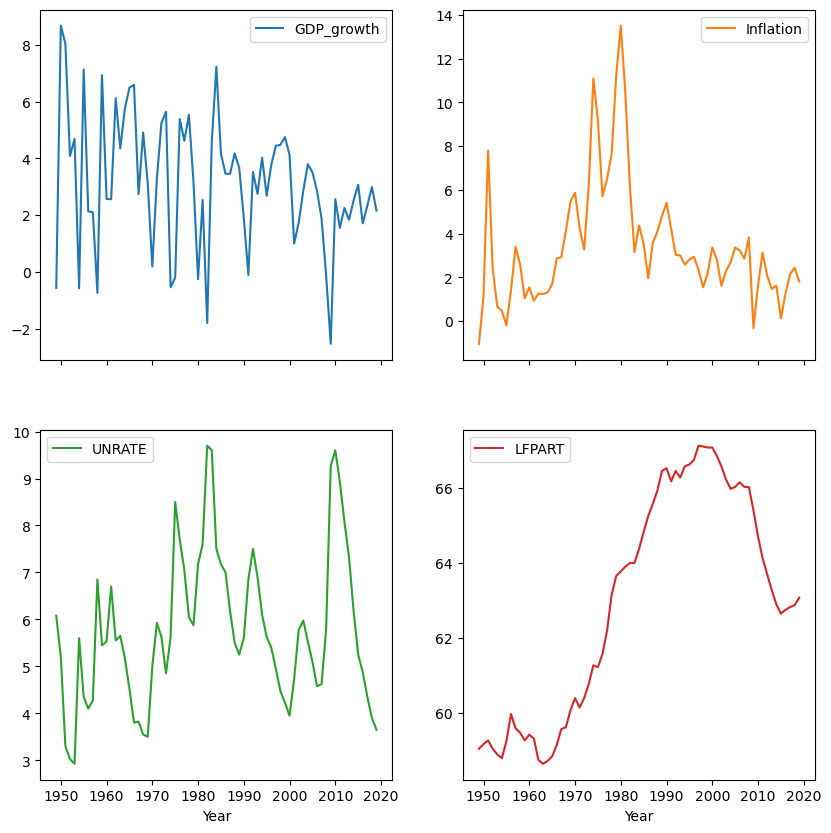

In [38]:
import pandas as pd

filepath = '../data/FRED_QTR.csv'

df = pd.read_csv(filepath, sep=',', index_col=['Year', 'Quarter'])
# Alternatively, set index columns later
# df = pd.read_csv(filepath, sep=',')
# df.set_index(keys=['Year', 'Quarter'], inplace=True)

# Convert to annual frequency
# Group by year
grp = df.groupby(['Year'])
# Compute annual data as mean of quarterly values
df_year = grp.mean()

# Alternative ways to perform the same aggregation:
# df_year = grp.agg('mean')
# df_year = grp.agg(np.mean)

# Compute CPI and GDP growth rates (in percent)
df_year['Inflation'] = df_year['CPI'].diff() / df_year['CPI'].shift() * 100.0
df_year['GDP_growth'] = df_year['GDP'].diff() / df_year['GDP'].shift() * 100.0

# Drop all rows that contain any NaNs
df_year = df_year.dropna(axis=0)

# Columns to plot
varnames = ['GDP_growth', 'Inflation', 'UNRATE', 'LFPART']
df_year.plot.line(y=varnames, subplots=True, layout=(2, 2),  
                  sharex=True, figsize=(10, 10))
                
# Alternatively, we can call plot() directly, which
# defaults to generating a line plot:
#
# df_year.plot(y=varnames, subplots=True, layout=(2, 2),  
#              sharex=True, figsize=(10, 10))


A few comments:

1.  We can set the index column when loading a CSV file by
    passing the column names as `index_col`:

        df = pd.read_csv(filepath, sep=',', index_col=['Year', 'Quarter'])

    Alternatively, we can first load the CSV file and set the index later:

        df = pd.read_csv(filepath, sep=',')
        df.set_index(keys=['Year', 'Quarter'], inplace=True)
2.  There are several ways to compute the means of grouped data:
    1.  We can call `mean()` on the group object directly:

            df_year = grp.mean()
    
    2.  Alternatively, we can call `agg()` and pass it the aggregation
        routine that should be applied:

            df_year = grp.agg('mean')
            df_year = grp.agg(np.mean)

        Here we again have multiple options: pandas understands `'mean'` if
        passed as a string (which might not be the case for some other functions),
        or we pass an actual function such as `np.mean`.
3.  The easiest way to compute differences between adjacent rows is
    to use the [`diff()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html) method, which returns $x_t - x_{t-1}$.
    Pandas then automatically matches the correct
    values and sets the first observation to `NaN` as there is no preceding value to 
    compute the difference.

    To compute a growth rate $(x_t - x_{t-1})/x_{t-1}$, we additionally need to
    lag a variable to get the correct period in the denominator. In pandas this 
    is achieved using the [`shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) method (which defaults to shifting 
    by 1 period).
            

### Solution for exercise 2

This time we do not specify `index_cols` when reading in the CSV
data since we need `Year` as a regular variable, not as the index.

We then compute the decade for each year, using the fact that 
`//` performs division with integer truncation. As an example, 
1951 // 10 is 195, and (1951 // 10) * 10 = 1950, 
which we use to represent the 1950s.

In [39]:
import pandas as pd 

filepath = '../data/FRED_QTR.csv'

df = pd.read_csv(filepath, sep=',')

# Compute GDP growth rates, inflation (in percent)
df['GDP_growth'] = df['GDP'].diff() / df['GDP'].shift() * 100.0
df['Inflation'] = df['CPI'].diff() / df['CPI'].shift() * 100.0

# Assign decade using // to truncate division to
# integer part. So we have 194x // 10 = 194 for any x.
df['Decade'] = (df['Year'] // 10) * 10

grp = df.groupby(['Decade'])

# Print number of obs. by decade
print(grp.count())

# Create series that contains True for each
# decade if all variables have 40 observations.
use_decade = (grp.count() == 40).all(axis=1)
# Convert series to DataFrame, assign column name 'Keep'
df_decade = use_decade.to_frame('Keep')
# merge into original DataFrame, matching rows on value
# of column 'Decade'
df = df.merge(df_decade, on='Decade')
# Restrict data only to rows which are part of complete decade
df = df.loc[df['Keep'], :].copy()
# Drop 'Keep' column
del df['Keep']

# Compute average growth rates and unemployment rate by decade
grp = df.groupby(['Decade'])

df_avg = grp[['GDP_growth', 'Inflation', 'UNRATE']].mean()
# Convert to (approximate) annualised growth rates
df_avg['GDP_growth'] *= 4.0
df_avg['Inflation'] *= 4.0

        Year  Quarter  GDP  CPI  UNRATE  LFPART  GDPPOT  NROU  GDP_growth  \
Decade                                                                      
1940       8        8    8    8       8       8       4     4           7   
1950      40       40   40   40      40      40      40    40          40   
1960      40       40   40   40      40      40      40    40          40   
1970      40       40   40   40      40      40      40    40          40   
1980      40       40   40   40      40      40      40    40          40   
1990      40       40   40   40      40      40      40    40          40   
2000      40       40   40   40      40      40      40    40          40   
2010      40       40   40   40      40      40      40    40          40   

        Inflation  
Decade             
1940            7  
1950           40  
1960           40  
1970           40  
1980           40  
1990           40  
2000           40  
2010           40  


The tricky part is to keep only observations for "complete"
decades that have 40 quarters of data. We see that this 
is not the case for the 1940s:

1.  We group by `Decade` and use `count()` to determine
    the number of non-missing observations for each variable.
2.  `count() == 40` evaluates to `True` for some variable 
    if it has 40 observations.
3.  We then use [`all()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) to aggregate across all variables,
    i.e. we require 40 observations for every variable to
    keep the decade.
4.  Finally, we merge the indicator whether a decade should be kept in 
    the data set using [`merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), where we match on the value 
    of the column `Decade`. Note that the argument to `merge()` must 
    be a `DataFrame`, so we first have to convert our indicator data.
5.  Finally, we keep only those observations which have a flag that is `True`.

The rest of the exercise is straightforward as it just repeats 
what we have done previously. You can create the bar chart directly with
pandas as follows:

<AxesSubplot:xlabel='Decade'>

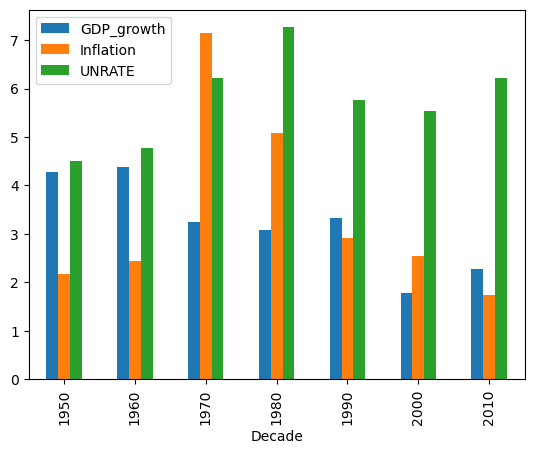

In [40]:
df_avg.plot.bar(y=['GDP_growth', 'Inflation', 'UNRATE'])

### Solution for exercise 3

We first read in the CSV file, specifying `';'` as the field 
separator:

In [41]:
import pandas as pd

# Load CSV file
filepath = '../data/universities.csv'
df = pd.read_csv(filepath, sep=';')

For the first task we use `apply()` to create a 
new `Series` object for each ratio of interest.

We compute the ratios for each institution
which will result in NaNs if either the numerator
of denominator is missing. We thus use `np.nanmean()`
to compute averages, ignoring any NaNs.

Finally, we combine all `Series` into a `DataFrame`.
We do this by specifying the data passed to 
`DataFrame()` as a dictionary, since then 
we can specify the column names as keys.

In [42]:
# Variant 1
# Compute means using apply()

grp = df.groupby(['Russell'])

# Create Series objects with the desired means
staff = grp.apply(lambda x: np.nanmean(x['Staff'] / x['Students']))
admin = grp.apply(lambda x: np.nanmean(x['Admin'] / x['Students']))
# Budget in millions of pounds
budget = grp.apply(lambda x: np.nanmean(x['Budget'] / x['Students']))
# Convert to pounds
budget *= 1.0e6
# Count number of institutions in each group.
# We can accomplish this by calling size() on the group object.
count = grp.size()

# Create a new DataFrame. Each column is a Series object.
df_all = pd.DataFrame({'Staff_Student': staff,
                       'Admin_Student': admin,
                       'Budget_Student': budget,
                       'Count': count})

df_all

,Staff_Student,Admin_Student,Budget_Student,Count
Russell,,,,
0,0.096219,0.147762,16847.834366,6
1,0.155131,0.169079,35406.453649,17


For the second task, we first insert additional columns
which contain the ratios of interest for each 
university.

We then drop all unused columns, group by the `Russell`
indicator and compute the means by directly 
calling `mean()` on the group object.

In [43]:
# Variant 2:
# Compute ratios first, apply aggregation later

# Create new variables directly in original DataFrame
df['Staff_Student'] = df['Staff'] / df['Students']
df['Admin_Student'] = df['Admin'] / df['Students']
# Budget in pounds (original Budget is in million pounds)
df['Budget_Student'] = df['Budget'] / df['Students'] * 1.0e6

# Keep only newly constructed ratios
columns_keep = [name for name in df.columns
                if name.endswith('_Student')]
# Also keep Russell indicator
columns_keep += ['Russell']
df = df[columns_keep].copy()

# Aggregate by Russell indicator
grp = df.groupby(['Russell'])
# Count number of institutions in each group.
# We can accomplish this by calling size() on the group object.
count = grp.size()

df_all = grp.mean()
# Add counter
df_all['Count'] = count

df_all

,Staff_Student,Admin_Student,Budget_Student,Count
Russell,,,,
0,0.096219,0.147762,16847.834366,6
1,0.155131,0.169079,35406.453649,17


We plot the results using pandas's `bar()` function.
Since the data is of vastly different magnitudes, we 
specify `sharey=False` so that each panel will have 
its own scaling on the $y$-axis.

array([[<AxesSubplot:title={'center':'Staff/Student'}, xlabel='Russell'>,
        <AxesSubplot:title={'center':'Admin/Student'}, xlabel='Russell'>],
       [<AxesSubplot:title={'center':'Budget/Student'}, xlabel='Russell'>,
        <AxesSubplot:title={'center':'Number of Univ.'}, xlabel='Russell'>]],
      dtype=object)

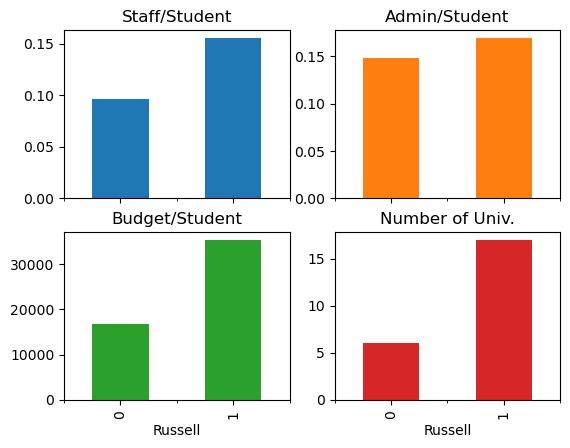

In [44]:
# Plot results as bar charts, one panel for each variable

# Pretty titles
title = ['Staff/Student', 'Admin/Student', 'Budget/Student', 'Number of Univ.']
# Create bar chart using pandas's bar() function
df_all.plot.bar(sharey=False, subplots=True, layout=(2, 2), legend=False,
                title=title)

### Solution for exercise 4

We create an indicator variable called `Pre1800` which
is set to `True` whenever the founding year in column
`Founded` is lower than 1800.

We then group the data by `Country` and `Pre1800` and 
count the number of universities in each group using 
`count()`.

In [45]:
import pandas as pd

# Load CSV file
filepath = '../data/universities.csv'
df = pd.read_csv(filepath, sep=';')

# Create mask for founding period
df['Pre1800'] = (df['Founded'] < 1800)

# Create group by country and founding period;
grp = df.groupby(['Country', 'Pre1800'])

# Number of universities by country and founding period.
# Since we are grouping by two attributes, this will create a
# Series with a multi-level (hierarchical) index
count = grp.size()

count

Country           Pre1800
England           False      8
                  True       5
Northern Ireland  False      1
Scotland          False      3
                  True       4
Wales             False      2
dtype: int64

The resulting `Series` only contains values for 
those combinations that are actually present in the data.
For example, the combination `(Wales, True)` does 
not show up because there are no Welsh universities
founded before 1800 in our sample. We will have to 
"complete" the data and add zero entries in all such cases.

First, we create a `DataFrame` with countries in rows and the number 
of universities for the pre- and post-1800 periods in columns.
To accomplish this, we need to pivot the second row index
using the [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) method. The `level=-1`
argument tells it to use the last row index, and `fill_value=0`
will assign zeros to all elements that were not present in the 
initial `DataFrame`, such as the combination `(Wales, True)`.

In [46]:
# DataFrame with countries in rows, Pre-1800 indicator in columns

# Pivot inner index level to create separate columns for True/False
# values of Pre1800 indicator
df_count = count.unstack(level=-1, fill_value=0)

# Set name of column index to something pretty: this will
# be used as the legend title
df_count.columns.rename('Founding year', inplace=True)
# Rename columns to get pretty labels in legend
df_count.rename(columns={True: 'Before 1800', False: 'After 1800'},
                inplace=True)

df_count

Founding year,After 1800,Before 1800
Country,,
England,8,5
Northern Ireland,1,0
Scotland,3,4
Wales,2,0


Whenever we use pandas's built-in plotting functions,
these use index names and labels to automatically 
label the graph. We therefore first have 
to assign these objects "pretty" names.

We can then generate the bar chart as follows:

<AxesSubplot:title={'center':'Number of universities by founding year'}, xlabel='Country'>

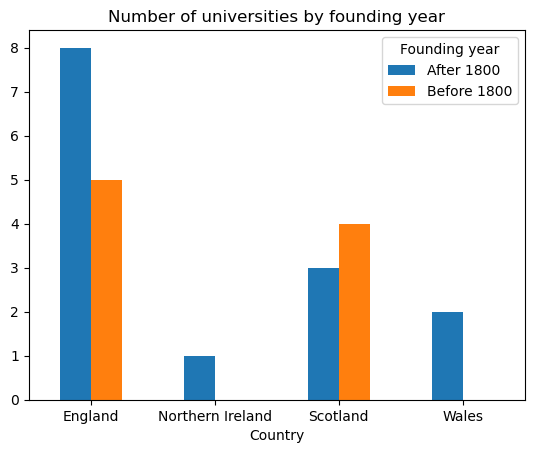

In [47]:
# Create bar chart by country
title = 'Number of universities by founding year'
# pass rot=0 to undo the rotation of x-tick labels
# which pandas applies by default
df_count.plot.bar(xlabel='Country', rot=0, title=title)

Note how the legend title is automatically set to the column index name 
and the legend labels use the column index labels.

We create the second `DataFrame` with the founding 
period in rows and country names in columns
in exactly the same way, but now call
`unstack(level=0)` so that the first index level 
will be pivoted.

In [48]:
# Pivot first row index level to create separate columns for each country
df_count = count.unstack(level=0, fill_value=0)

# Set index name to something pretty
df_count.index.rename('Founding year', inplace=True)
# Rename index labels to get pretty text in legend
df_count.rename(index={True: 'Before 1800', False: 'After 1800'},
                inplace=True)

df_count

Country,England,Northern Ireland,Scotland,Wales
Founding year,,,,
After 1800,8,1,3,2
Before 1800,5,0,4,0


<AxesSubplot:title={'center':'Number of universities by founding year'}, xlabel='Founding year'>

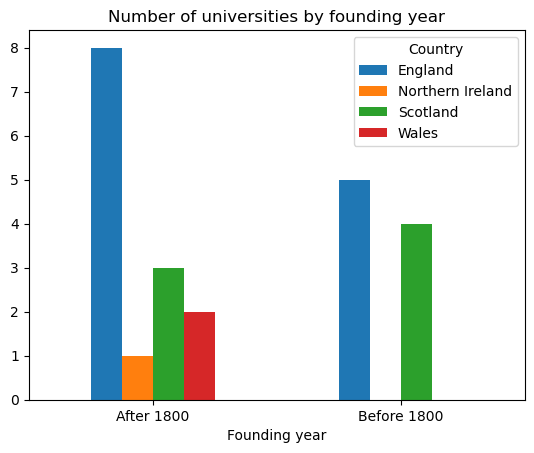

In [49]:
# Create bar chart by founding year
# pass rot=0 to undo the rotation of x-tick labels
# which pandas applies by default
df_count.plot.bar(rot=0, title=title)

### Solution for exercise 5

This exercise is quite involved, so we will discuss it in parts. 
First, we write the function that will be called by `apply()` to
process sub-sets of the data which belong to a single decade:

In [50]:
def regress_okun(x):
    # x is a DataFrame, restricted to rows for the current decade

    # Extract dependent and regressor variables
    outcome = x['unempl_gap'].to_numpy()
    GDP_gap = x['GDP_gap'].to_numpy()

    # Regressor matrix including intercept
    regr = np.ones((len(GDP_gap), 2))
    # overwrite second column with output gap
    regr[:,1] = GDP_gap

    # Solve least-squares problem (pass rcond=None to avoid a warning)
    coefs, *rest = np.linalg.lstsq(regr, outcome, rcond=None)

    # Construct DataFrame which will be returned to apply()
    # Convert data to 1 x 2 matrix
    data = coefs[None]
    columns = ['Const', 'GDP_gap']
    df_out = pd.DataFrame(data, columns=columns)

    return df_out

This function is passed in a single argument which is a 
`DataFrame` restricted to the sub-sample that is currently
being processed.

-   Our task is to perform the required calculations
    and to return the result as a `DataFrame`. `apply()`
    then glues together all decade-specific DataFrames 
    to form the result of the operation.
-   We first extract the relevant variables as NumPy arrays,
    and we create a regressor matrix which has ones in
    the first column. This column represents the intercept.
-   We invoke `lstsq()` to run the regression. `lstsq()`
    returns several arguments which we mop up in the tuple 
    `*rest` since we are only interested in the regression 
    coefficients.

    Note that we wouldn't be using `lstsq()` to run OLS 
    on a regular basis, but it's sufficient for this use case.
    
-   Finally, we build the `DataFrame` to be returned 
    by this function. It has only one row (since we ran
    only one regression) and two columns, one for each 
    regression coefficient.

This was the hard part. We now need to perform some standard 
manipulations to prepare the data:

1.  We construct the output gap (in percent), which 
    we store in the column `GDP_gap`.
2.  We construct the cyclical unemployment rate and 
    store it in the column `unempl_gap`.
3.  We determine the decade each observation belongs
    to using the same code as in previous 
    exercises.
4.  We then drop all unused variables from the `DataFrame`
    and also all observations which contain missing values.

Lastly, we can call `apply()` to run the regression for 
each decade.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
filepath = '../data/FRED_QTR.csv'
df = pd.read_csv(filepath, sep=',')

# Generate output gap (in percent)
df['GDP_gap'] = (df['GDP'] - df['GDPPOT']) / df['GDPPOT'] * 100.0

# Generate deviations of unempl. rate from natural unempl. rate
df['unempl_gap'] = df['UNRATE'] - df['NROU']

# Assign decade using // to truncate division to
# integer part. So we have 194x // 10 = 194 for any x.
df['Decade'] = (df['Year'] // 10) * 10

# Keep only variables of interest
df = df[['Decade', 'GDP_gap', 'unempl_gap']]
# Drop rows with any missing obs.
df = df.dropna(axis=0)

# Group by decade
grp = df.groupby(['Decade'])

# Apply regression routine to sub-set of data for each decade
df_reg = grp.apply(regress_okun)
# Get rid of second row index introduced by apply()
df_reg = df_reg.reset_index(level=-1, drop=True)

# Display intercept and slope coefficients
# estimated for each decade.
df_reg



,Const,GDP_gap
Decade,,
1940,-0.259986,-0.567257
1950,-0.277104,-0.494637
1960,-0.331665,-0.467206
1970,-0.032063,-0.398751
1980,-0.178001,-0.666688
1990,-0.102465,-0.489427
2000,-0.355138,-0.723567
2010,-0.279333,-0.983768


The following code creates 8 panels of scatter plots showing
the raw data and overlays a regression line for each decade.

Text(0.5, 0.98, "Okun's law")

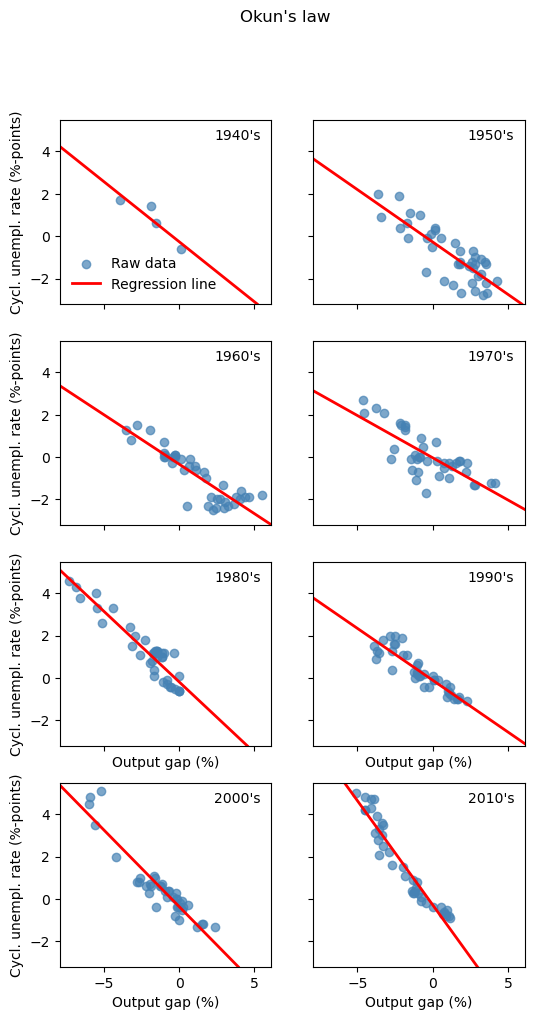

In [52]:
# Number of plots (= number of decades)
Nplots = len(df_reg)

# Fix number of columns, determine rows as needed
ncol = 2
nrow = int(np.ceil(Nplots / ncol))

fig, axes = plt.subplots(nrow, ncol, sharey=True, sharex=True, 
                         figsize=(6, 11))

for i, ax in enumerate(axes.flatten()):
    
    # decade in current iteration
    decade = df_reg.index.values[i]
    # restrict DataFrame to decade-specific data
    dfi = df.loc[df['Decade'] == decade]
    # Scatter plot of raw data
    ax.scatter(dfi['GDP_gap'], dfi['unempl_gap'], color='steelblue',
               alpha=0.7, label='Raw data')
    # Extract regression coefficients
    const = df_reg.loc[decade, 'Const']
    slope = df_reg.loc[decade, 'GDP_gap']

    # plot regression line:
    # We need to provide one point and a slope to define the line to be plotted.
    ax.axline((0.0, const), slope=slope, color='red',
              lw=2.0, label='Regression line')

    # Add label containing the current decade
    ax.text(0.95, 0.95, f"{decade}'s", transform=ax.transAxes,
            va='top', ha='right')

    # Add legend in the first panel only
    if i == 0:
        ax.legend(loc='lower left', frameon=False)

    # Add x- and y-labels, but only for those panels
    # that are on the left/lower boundary of the figure
    if i >= nrow * (ncol - 1):
        ax.set_xlabel('Output gap (%)')
    if (i % ncol) == 0:
        ax.set_ylabel('Cycl. unempl. rate (%-points)')

fig.suptitle("Okun's law")